<a href="https://colab.research.google.com/github/mohdazam88/task_2/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [111]:
# Read the dataset from CSV file
train = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/tested.csv')

In [112]:
# Displaying the top 5 rows of data
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
# Give the structure of the dataset
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
# Checking, How many null values are present in each column
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
#EXPLORATORY DATA ANALYSIS


<Axes: xlabel='Survived', ylabel='count'>

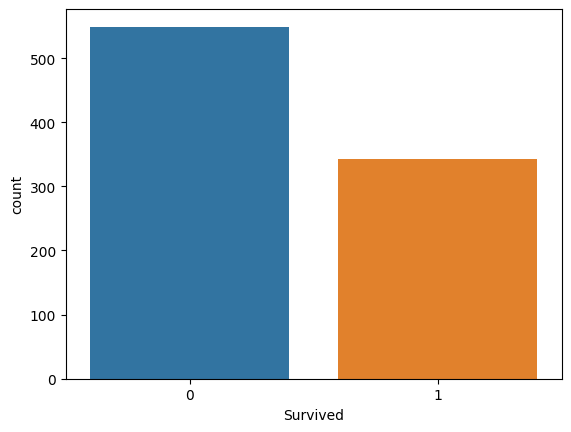

In [117]:
sns.countplot(x = 'Survived',data = train)


<Axes: xlabel='Pclass', ylabel='count'>

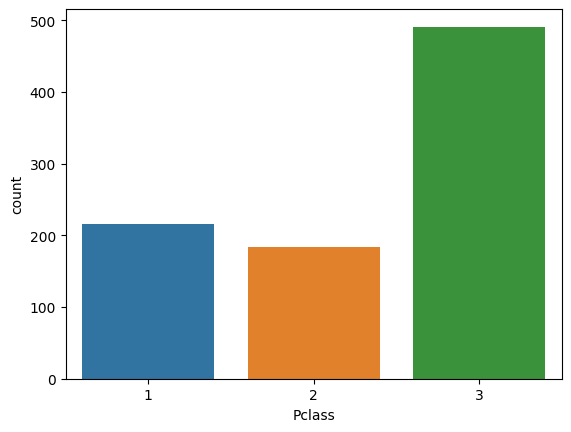

In [118]:
sns.countplot(x='Pclass',data = train)


<Axes: xlabel='Sex', ylabel='count'>

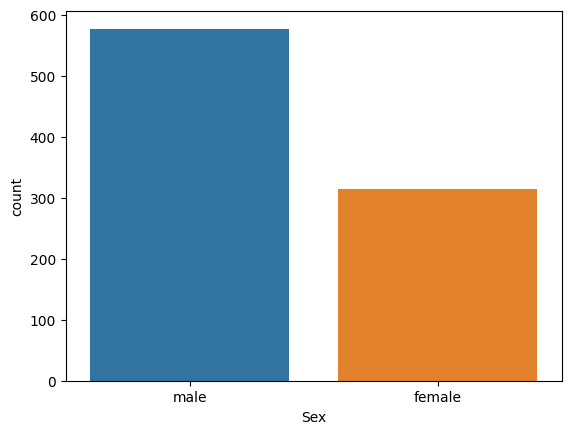

In [119]:
sns.countplot(x='Sex',data = train)


<Axes: xlabel='SibSp', ylabel='count'>

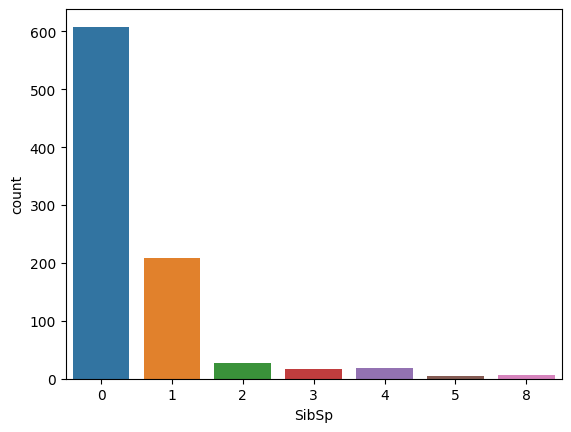

In [120]:
sns.countplot(x='SibSp',data = train)
# Majority of people were travelling without their siblings or spouse


<Axes: xlabel='Parch', ylabel='count'>

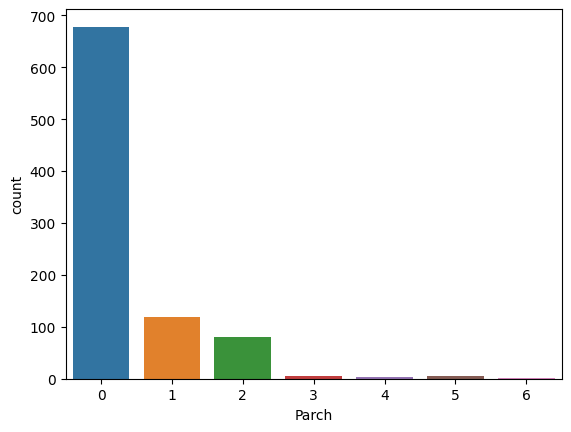

In [121]:
sns.countplot(x='Parch',data = train)
# Majority of people were traveling without parents or child


<Axes: xlabel='Embarked', ylabel='count'>

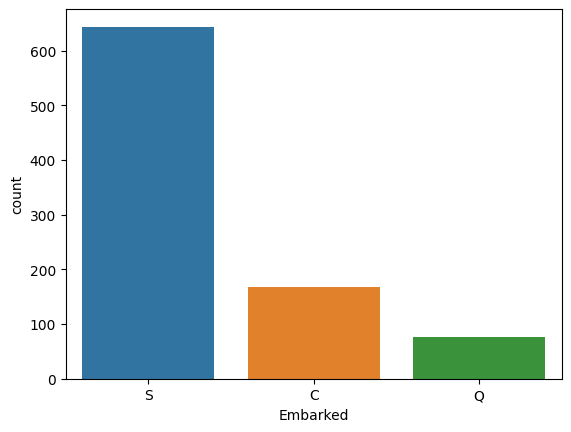

In [122]:
sns.countplot(x='Embarked',data = train)
# This helps us assume that city 5 may be the starting station of the journey

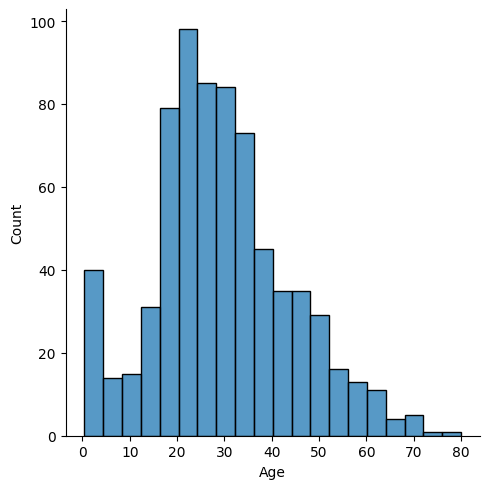

In [123]:
sns.displot(train['Age'])
# we can also use: sns.histplot(train["Age"])
# or train["Age"].plot.hist()
# It gives us a distribution plot


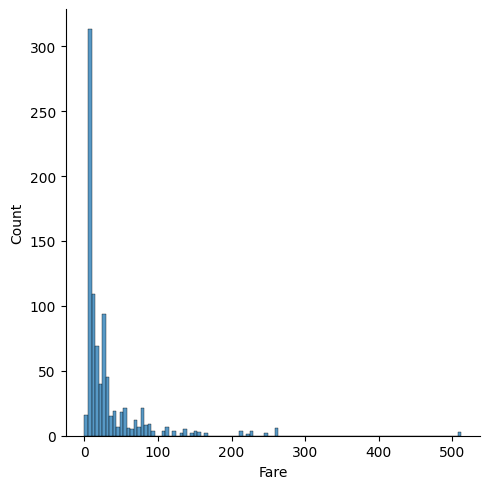

In [124]:
sns.displot(train['Fare'])


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

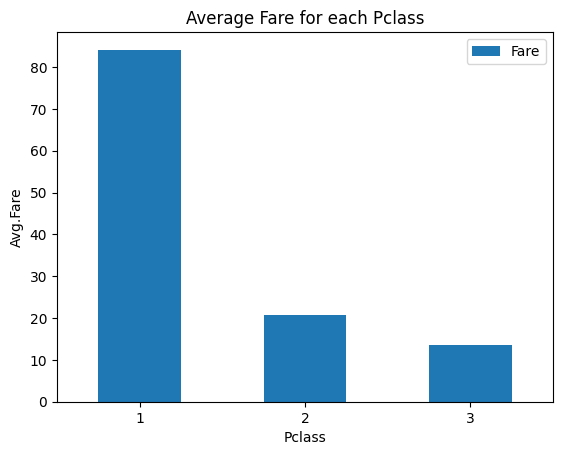

In [125]:
train.pivot_table(index='Pclass',values='Fare').plot(kind='bar')

# It will calculate mean for each passenger class and plot it in form of bargraph

plt.title('Average Fare for each Pclass')
plt.xlabel('Pclass') #changing label of x-axis
plt.ylabel('Avg.Fare') #changing label of x-axis
plt.xticks(rotation=0)


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

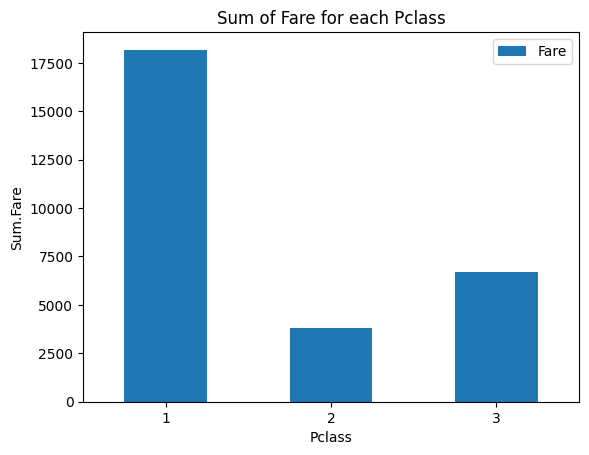

In [126]:
# When agg.function is not provided, by default pivot_table() function will take

train.pivot_table(index='Pclass',values= 'Fare',aggfunc=np.sum).plot(kind='bar')

#It will calculate sum of fare each passenger class

plt.title('Sum of Fare for each Pclass')
plt.xlabel('Pclass')
plt.ylabel('Sum.Fare')
plt.xticks(rotation=0)


In [127]:
#DATA PREPROVESSING


In [128]:
titanic_len = len(train)
titanic = pd.concat([train,test],axis = 0)
titanic = titanic.reset_index(drop=True)
#To drop the index


In [129]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [130]:
titanic.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [131]:
# Droping the cabin as it is of no use
titanic = titanic.drop(columns='Cabin',axis = 1)
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [132]:
# Filling the missing values using mean of that column as they are numerical column
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())


In [133]:
# Filling missing values using the mode of that column as it categorical column
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])



In [134]:
titanic.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [135]:
#LONG TRANSFORMATION FOR UNIFORM DISTRIBUTION


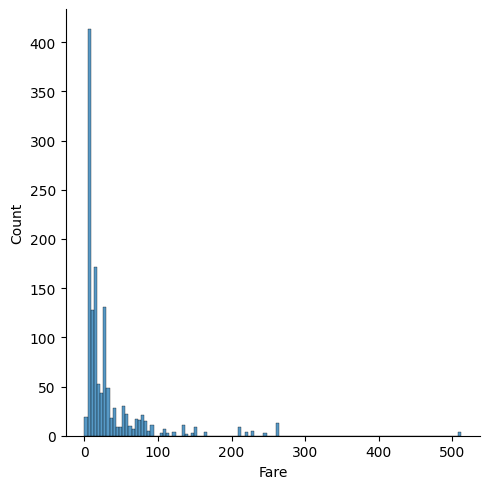

In [136]:
sns.displot(titanic['Fare'])


In [137]:
titanic['Fare'] = np.log(titanic['Fare']+1)
# We have added +1 because in case the fare is zero or has null value


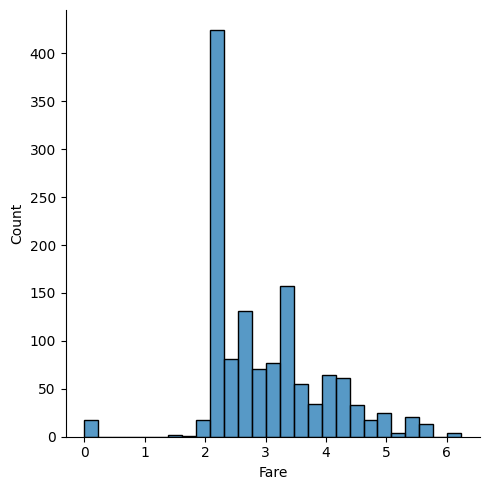

In [138]:
sns.displot(titanic['Fare'])


<ipython-input-139-101cf0fec81b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(),annot = True)


<Axes: >

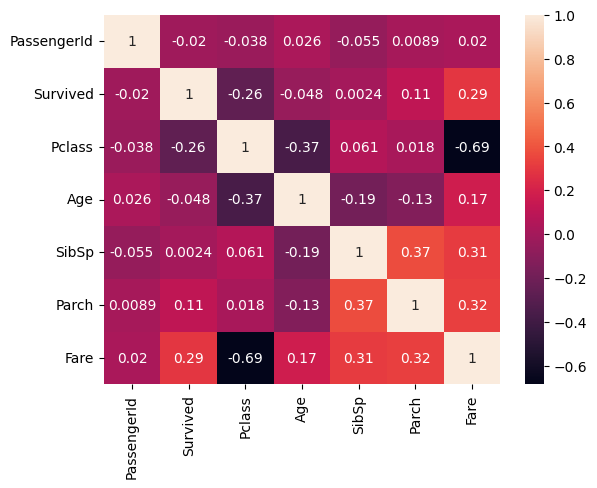

In [139]:
sns.heatmap(titanic.corr(),annot = True)


Text(0.5, 1.0, 'Fare over Pclass graph who survived')

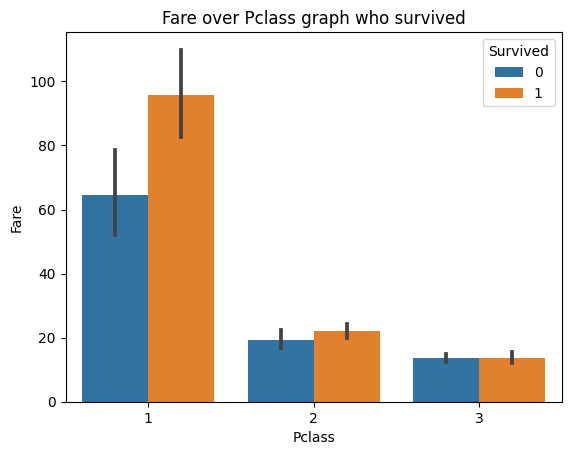

In [140]:
sns.barplot(data = train, x='Pclass',y='Fare',hue='Survived')
plt.title('Fare over Pclass graph who survived')


Text(0.5, 1.0, 'Fare of people who surviveded by different Pclass')

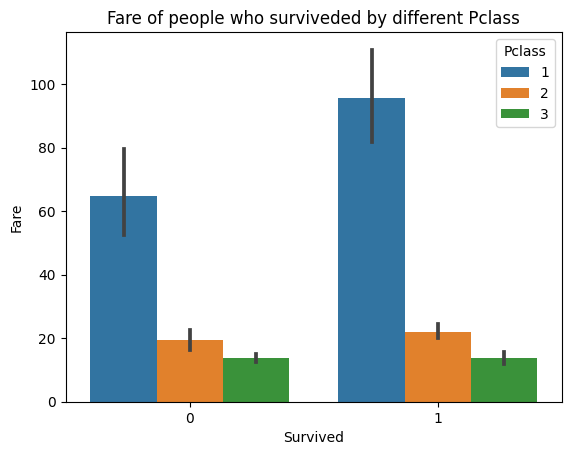

In [141]:
sns.barplot(data = train, x='Survived',y='Fare',hue='Pclass')
plt.title('Fare of people who surviveded by different Pclass')


In [142]:
# DROPPING UNNECESSARY DATA

In [143]:
titanic = titanic.drop(columns = ['Name','Ticket'],axis = 1)
titanic


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,2.110213,S
1,2,1,1,female,38.000000,1,0,4.280593,C
2,3,1,3,female,26.000000,0,0,2.188856,S
3,4,1,1,female,35.000000,1,0,3.990834,S
4,5,0,3,male,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,29.881138,0,0,2.202765,S
1305,1306,1,1,female,39.000000,0,0,4.699571,C
1306,1307,0,3,male,38.500000,0,0,2.110213,S
1307,1308,0,3,male,29.881138,0,0,2.202765,S


In [144]:
#LABEL ENCODING


In [145]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()
for col in cols:
  titanic[col] = le.fit_transform(titanic[col])
titanic


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,2.110213,2
1,2,1,1,0,38.000000,1,0,4.280593,0
2,3,1,3,0,26.000000,0,0,2.188856,2
3,4,1,1,0,35.000000,1,0,3.990834,2
4,5,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,1,29.881138,0,0,2.202765,2
1305,1306,1,1,0,39.000000,0,0,4.699571,0
1306,1307,0,3,1,38.500000,0,0,2.110213,2
1307,1308,0,3,1,29.881138,0,0,2.202765,2


In [146]:
# TRAIN-TEST SPLIT


In [147]:
# Splitting the datasets for training and validation
train_len = len(train)
test_len = len(test)
# syntax : iloc[starting row : starting column : ending column]
train = titanic.iloc[:train_len, :]
test = titanic.iloc[train_len:, :]
titanic.iloc


In [148]:
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,2.110213,2
1,2,1,1,0,38.000000,1,0,4.280593,0
2,3,1,3,0,26.000000,0,0,2.188856,2
3,4,1,1,0,35.000000,1,0,3.990834,2
4,5,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,2.639057,2
887,888,1,1,0,19.000000,0,0,3.433987,2
888,889,0,3,0,29.881138,1,2,3.196630,2
889,890,1,1,1,26.000000,0,0,3.433987,0


In [149]:
test


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0,3,1,34.500000,0,0,2.178064,1
892,893,1,3,0,47.000000,1,0,2.079442,2
893,894,0,2,1,62.000000,0,0,2.369075,1
894,895,0,3,1,27.000000,0,0,2.268252,2
895,896,1,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,1,29.881138,0,0,2.202765,2
1305,1306,1,1,0,39.000000,0,0,4.699571,0
1306,1307,0,3,1,38.500000,0,0,2.110213,2
1307,1308,0,3,1,29.881138,0,0,2.202765,2


In [150]:
# Input split
x= train.drop(columns=['PassengerId','Survived'], axis = 1)
y = train['Survived']
# Check the input attributes we gonna use for testing
x.head()
#y.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [151]:
# MODEL TRAINING


In [152]:
# Import the model
from sklearn.model_selection import train_test_split, cross_val_score


In [153]:
def classify(model,x,y):
  x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state= 4)
  model.fit(x_train, y_train)
  print('Accuracy: ',model.score(x_test, y_test))

  score = cross_val_score(model,x,y)
  print(score)
  print('Crossd Validation Score:', np.mean(score))


In [154]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)


Accuracy:  0.8161434977578476
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
Crossd Validation Score: 0.7833971502102819


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)


Accuracy:  0.8295964125560538
[0.73743017 0.76404494 0.79213483 0.73595506 0.80898876]
Crossd Validation Score: 0.7677107526206767


In [156]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)


Accuracy:  0.8161434977578476
[0.7877095  0.80337079 0.85955056 0.78651685 0.83707865]
Crossd Validation Score: 0.8148452702278577


In [157]:
# COMPLETE MODEL TRAINING WITH FULL DATA


In [158]:
model = LogisticRegression()
model.fit(x,y)


LogisticRegression()

In [159]:
test.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0,3,1,34.5,0,0,2.178064,1
892,893,1,3,0,47.0,1,0,2.079442,2
893,894,0,2,1,62.0,0,0,2.369075,1
894,895,0,3,1,27.0,0,0,2.268252,2
895,896,1,3,0,22.0,1,1,2.586824,2


In [160]:
x_test = test.drop(columns=['PassengerId','Survived'],axis =  1)


In [161]:
x_test


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.500000,0,0,2.178064,1
892,3,0,47.000000,1,0,2.079442,2
893,2,1,62.000000,0,0,2.369075,1
894,3,1,27.000000,0,0,2.268252,2
895,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...
1304,3,1,29.881138,0,0,2.202765,2
1305,1,0,39.000000,0,0,4.699571,0
1306,3,1,38.500000,0,0,2.110213,2
1307,3,1,29.881138,0,0,2.202765,2


In [162]:
# SHOW PREDICTION RESULTS

pred = model.predict(x_test)
pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [163]:
# TEST SUBMISSION


In [165]:
# Import in the submission template file
sub = pd.read_csv('/content/drive/MyDrive/Gender-submission.csv')
sub


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [166]:
# Replacing the survived column of submission template with the survived data
sub['Survived'] = pred
sub


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [167]:
# Exporting the result to a csv file to be submitted
sub.to_csv('predict result.csv',index = False)
